In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [226]:
mll_results = pd.read_csv('../BreastCancer/BC_final_results.csv', index_col=0)

In [334]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

In [335]:
sample_info = pd.read_csv('../BreastCancer/BC_sample_info.csv', index_col=0)

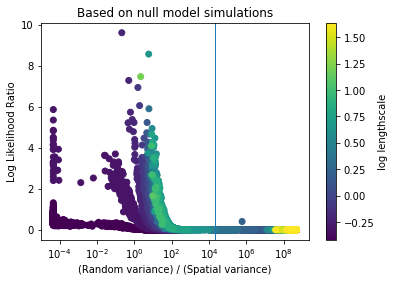

In [336]:
plt.title('Based on null model simulations')
plt.xscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.D, c=np.log10(sim_mll_results.l))
plt.axvline(np.exp(10), lw=1);
plt.colorbar(label='log lengthscale');
plt.xlabel('(Random variance) / (Spatial variance)')
plt.ylabel('Log Likelihood Ratio');

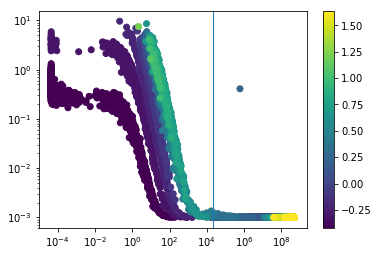

In [337]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.D, c=np.log10(sim_mll_results.l))
plt.axvline(np.exp(10), lw=1);
plt.colorbar();

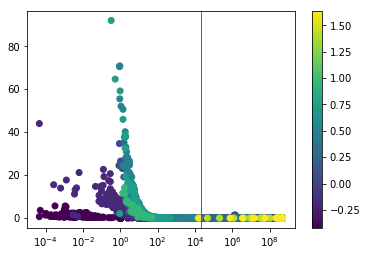

In [338]:
plt.xscale('log')
plt.scatter(mll_results.max_delta, mll_results.D, c=np.log10(mll_results.l))
plt.axvline(np.exp(10), lw=1);
plt.colorbar();

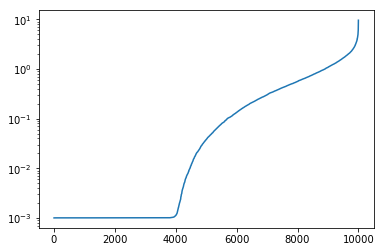

In [339]:
tmp = sim_mll_results.D.sort_values().values
plt.yscale('log')
plt.plot(tmp);

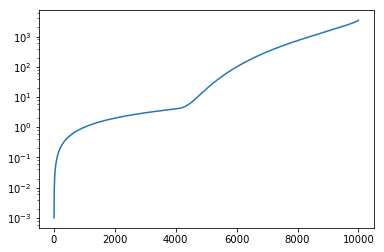

In [347]:
tmp = sim_mll_results.D.sort_values().values
plt.yscale('log')
plt.plot(tmp.cumsum());

In [340]:
counts, bins = np.histogram(np.log(sim_mll_results.D), bins=200)

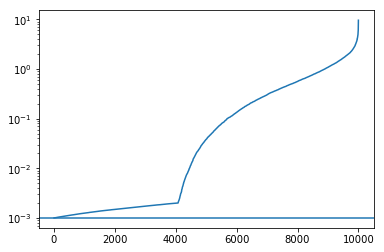

In [352]:
tmp = (sim_mll_results.D + np.random.uniform(0., 1e-3, sim_mll_results.D.shape)).sort_values().values
plt.yscale('log')
plt.plot(tmp);
plt.axhline(np.exp(bins[counts.argmax()]))

In [353]:
np.exp(bins[counts.argmax()])

0.00099938548441969076

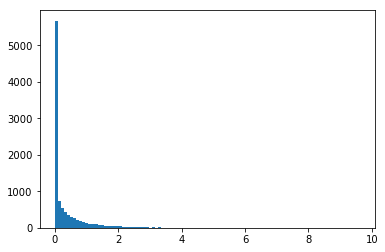

In [354]:
plt.hist(sim_mll_results.D, bins=100);

In [355]:
sim_mll_results['Dplus'] = sim_mll_results.D + np.random.uniform(0., 1e-3, sim_mll_results.D.shape)

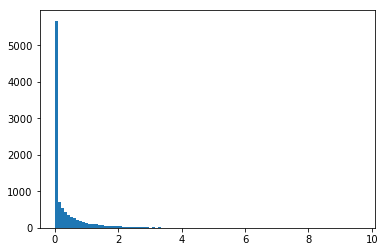

In [356]:
plt.hist(sim_mll_results.Dplus, bins=100);

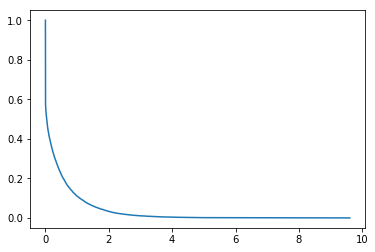

In [416]:
# plt.yscale('log')
Dplus_empirical = sim_mll_results.Dplus.sort_values().values
probs = 1 - np.arange(sim_mll_results.shape[0]) / sim_mll_results.shape[0]
plt.plot(Dplus_empirical, probs);

In [410]:
1 - ((sim_mll_results.shape[0] - 1) / sim_mll_results.shape[0])

9.999999999998899e-05

In [411]:
1 / sim_mll_results.shape[0]

0.0001

In [440]:
D = np.linspace(0, 10.)

In [441]:
@np.vectorize
def get_emp_pval(D):
    return 1 - (Dplus_empirical < D).sum() / sim_mll_results.shape[0]

In [442]:
D

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

In [443]:
get_emp_pval(2.)

array(0.03359999999999996)

In [444]:
get_emp_pval(D)

array([  1.00000000e+00,   3.55400000e-01,   2.55000000e-01,
         1.86800000e-01,   1.40100000e-01,   1.07800000e-01,
         8.50000000e-02,   6.58000000e-02,   5.21000000e-02,
         4.11000000e-02,   3.17000000e-02,   2.46000000e-02,
         1.96000000e-02,   1.55000000e-02,   1.24000000e-02,
         1.04000000e-02,   8.50000000e-03,   6.90000000e-03,
         5.20000000e-03,   4.70000000e-03,   3.90000000e-03,
         2.80000000e-03,   2.30000000e-03,   2.00000000e-03,
         1.60000000e-03,   1.40000000e-03,   1.10000000e-03,
         9.00000000e-04,   9.00000000e-04,   6.00000000e-04,
         5.00000000e-04,   5.00000000e-04,   5.00000000e-04,
         5.00000000e-04,   4.00000000e-04,   4.00000000e-04,
         3.00000000e-04,   2.00000000e-04,   2.00000000e-04,
         2.00000000e-04,   2.00000000e-04,   2.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         0.00000000e+00,

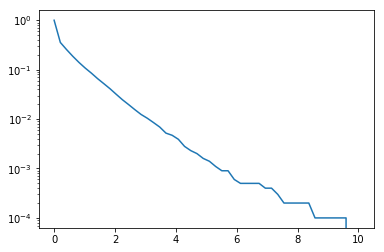

In [535]:
plt.yscale('log')
plt.plot(D, get_emp_pval(D));

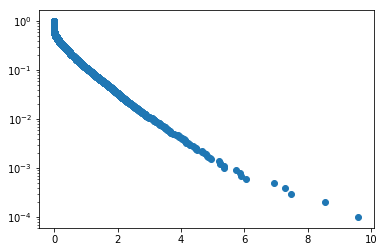

In [546]:
plt.yscale('log')
plt.scatter(sim_mll_results.Dplus, get_emp_pval(sim_mll_results.Dplus));

In [553]:
from scipy import optimize

In [689]:
polynomial = lambda x, a, b, c: a * np.arctan(b * x) + c

In [690]:
tmp = sim_mll_results.query('Dplus > .1')
pars, _ = optimize.curve_fit(polynomial, tmp.Dplus, np.log10(get_emp_pval(tmp.Dplus)))

In [691]:
pars

array([-3.23483045,  0.18702485, -0.34006707])

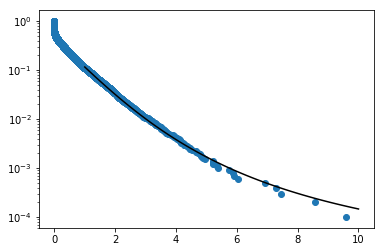

In [692]:
D = np.linspace(1, 10)
plt.yscale('log')
plt.scatter(sim_mll_results.Dplus, get_emp_pval(sim_mll_results.Dplus));
plt.plot(D, 10 ** polynomial(D, *pars), c='k')

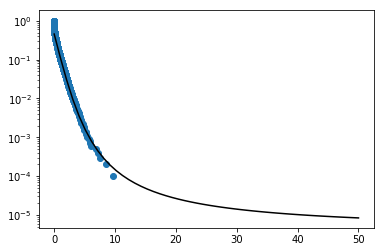

In [693]:
D = np.linspace(0, 50)
plt.yscale('log')
plt.scatter(sim_mll_results.Dplus, get_emp_pval(sim_mll_results.Dplus));
plt.plot(D, 10 ** polynomial(D, *pars), c='k')

In [694]:
sim_mll_results.Dplus.max()

9.6026033823391614

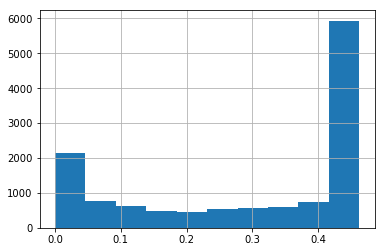

In [695]:
(10 ** polynomial(mll_results.Dplus, *pars)).hist()

In [696]:
def get_more_pvals(D):
    if D > sim_mll_results.Dplus.max():
        pval = 10 ** polynomial(D, *pars)
    else:
        pval = get_emp_pval(D)
        
    return pval

In [698]:
pvals = mll_results.Dplus.map(get_more_pvals)

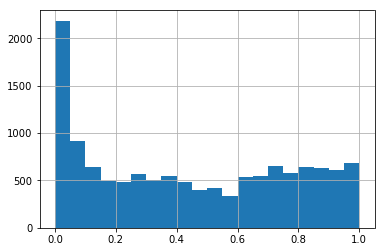

In [703]:
pvals.hist(bins=20)

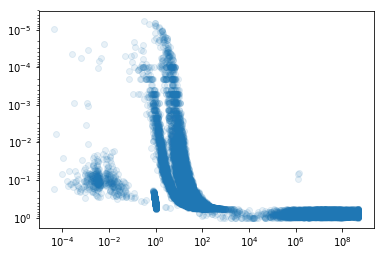

In [701]:
plt.loglog()
plt.scatter(mll_results.max_delta, pvals, alpha=0.1);
plt.gca().invert_yaxis();

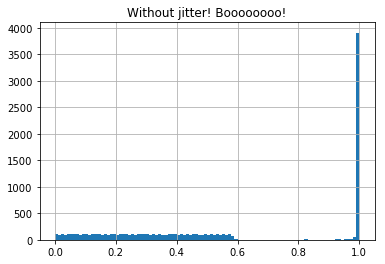

In [459]:
plt.title('Without jitter! Boooooooo!')
sim_mll_results.D.apply(get_emp_pval).hist(bins=100);

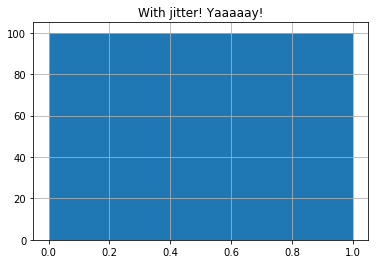

In [460]:
plt.title('With jitter! Yaaaaay!')
sim_mll_results.Dplus.apply(get_emp_pval).hist(bins=100);

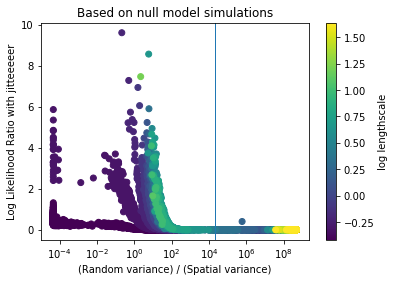

In [458]:
plt.title('Based on null model simulations')
plt.xscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.Dplus, c=np.log10(sim_mll_results.l))
plt.axvline(np.exp(10), lw=1);
plt.colorbar(label='log lengthscale');
plt.xlabel('(Random variance) / (Spatial variance)')
plt.ylabel('Log Likelihood Ratio with jitteeeeer');

In [471]:
mll_results['Dplus'] = mll_results.D + np.random.uniform(0., 1e-3, mll_results.D.shape)

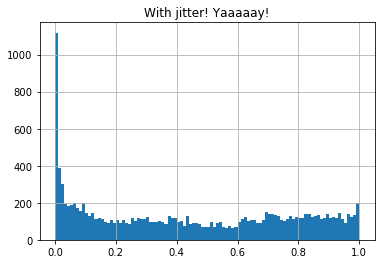

In [472]:
plt.title('With jitter! Yaaaaay!')
mll_results.Dplus.apply(get_emp_pval).hist(bins=100);

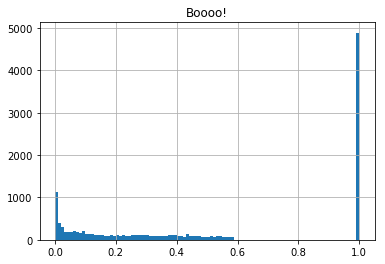

In [473]:
plt.title('Boooo!')
mll_results.D.apply(get_emp_pval).hist(bins=100);

In [540]:
s = mll_results.Dplus.apply(get_emp_pval)

In [ ]:
s.clip_lower()

In [541]:
pval = mll_results.Dplus.apply(get_emp_pval).clip_lower(1 / sim_mll_results.shape[0])

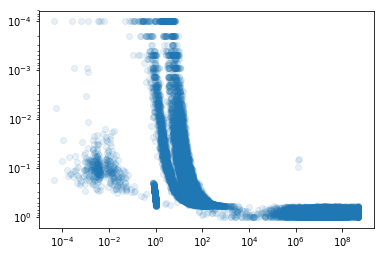

In [543]:
plt.loglog()
plt.scatter(mll_results.max_delta, pval, alpha=0.1);
plt.gca().invert_yaxis();

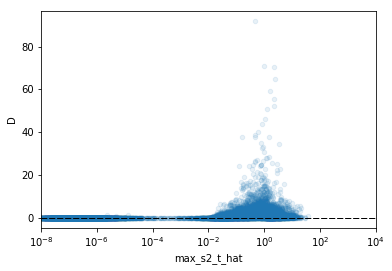

In [357]:
mll_results.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-8, 1e4), alpha=.1);
for y in mll_results.D.mode():
    plt.axhline(y, c='k', lw=1, ls='--')

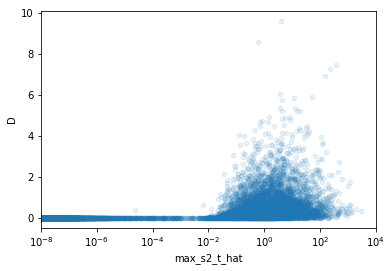

In [360]:
sim_mll_results.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-8, 1e4), alpha=.1);

In [361]:
from scipy import stats

In [519]:
par = stats.gamma.fit(sim_mll_results.Dplus)
par

(0.22117872318171378, 0.0010027337973094641, 2.1164266854138898)

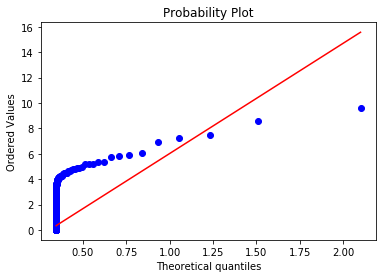

In [518]:
ax = plt.gca()
stats.probplot(sim_mll_results.Dplus, dist=stats.gamma, sparams=par, plot=ax);

In [512]:
gamma_rv = stats.gamma(*par)

In [513]:
gamma_rv.sf(sim_mll_results.D.max())

0.00069708086302421057

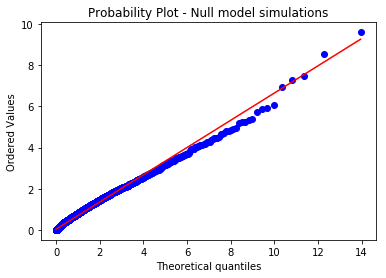

In [514]:
ax = plt.gca()
stats.probplot(sim_mll_results.Dplus, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Null model simulations');
plt.savefig('probplot_MOB_sim_fit.pdf')

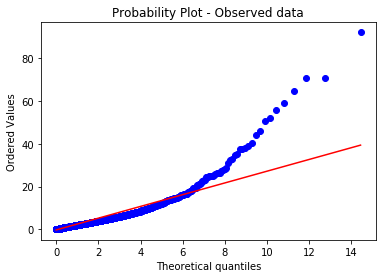

In [515]:
ax = plt.gca()
qq_res = stats.probplot(mll_results.Dplus, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Observed data');
plt.savefig('probplot_MOB_observed_applied.pdf')

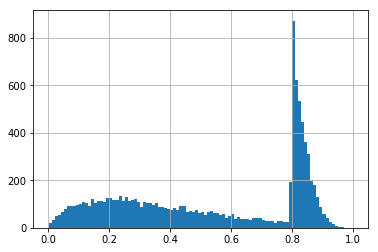

In [516]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.Dplus)
sim_mll_results.pval.hist(bins=100);

In [371]:
pval = gamma_rv.sf(mll_results.D)

In [23]:
mll_results['pval'] = pval

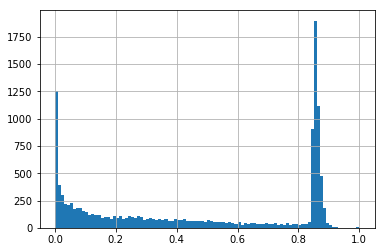

In [30]:
mll_results.pval.hist(bins=100);

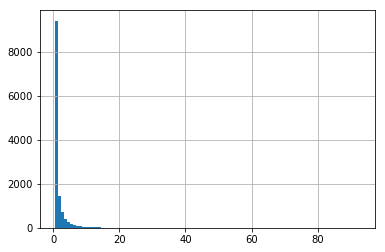

In [31]:
mll_results.D.hist(bins=100)

In [32]:
mll_results.D.describe()

count    12856.000000
mean         1.546270
std          2.943737
min          0.491309
25%          0.500579
50%          0.631229
75%          1.518132
max         92.596299
Name: D, dtype: float64

In [33]:
mll_results.D.mode()

0    0.500524
1    0.500563
2    0.500663
dtype: float64

In [34]:
gamma_rv.sf(0.5)

0.86825168867417624

In [24]:
(mll_results.shape[0] * mll_results.pval < 0.05).sum()

159

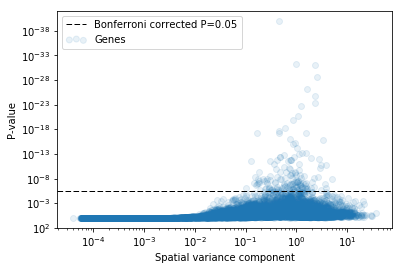

In [25]:
plt.loglog()
plt.scatter(mll_results.max_s2_t_hat, mll_results.pval, alpha=0.1, label='Genes');
plt.gca().invert_yaxis();
plt.axhline(0.05 / mll_results.shape[0], lw=1, linestyle='--', c='k', label='Bonferroni corrected P=0.05')
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');
plt.legend(scatterpoints=3);

In [43]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

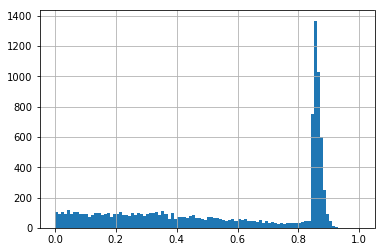

In [45]:
sim_mll_results.pval.hist(bins=100);

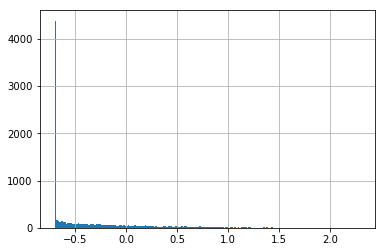

In [51]:
sim_mll_results.D.pipe(np.log).hist(bins=200);

In [52]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

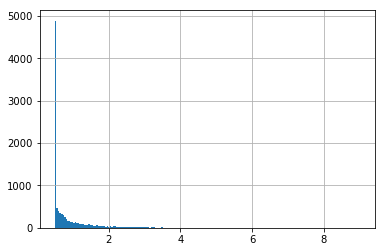

In [57]:
sim_mll_results.D.hist(bins=200);

In [58]:
par = stats.gamma.fit(sim_mll_results.D)
gamma_rv = stats.gamma(*par)

In [59]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

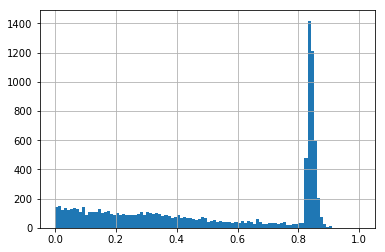

In [60]:
sim_mll_results.pval.hist(bins=100);

In [143]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

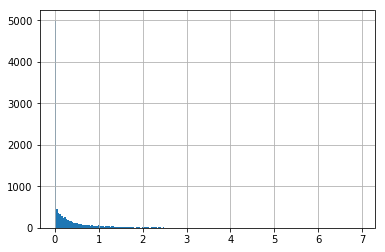

In [144]:
sim_mll_results.D.hist(bins=200);

In [145]:
par = stats.gamma.fit(sim_mll_results.D)
gamma_rv = stats.gamma(*par)

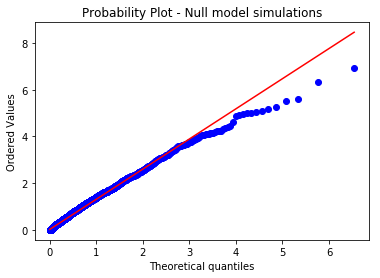

In [146]:
ax = plt.gca()
stats.probplot(sim_mll_results.D, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Null model simulations');

In [147]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

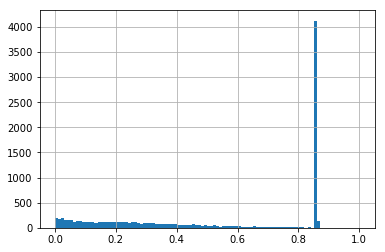

In [148]:
sim_mll_results.pval.hist(bins=100);

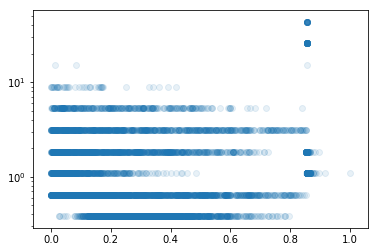

In [149]:
plt.yscale('log')
plt.scatter(sim_mll_results.pval, sim_mll_results.l, alpha=0.1);

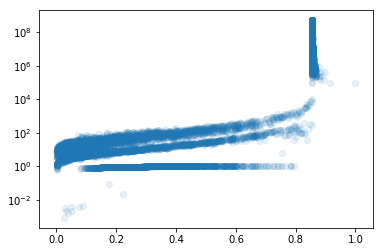

In [150]:
plt.yscale('log')
plt.scatter(sim_mll_results.pval, sim_mll_results.max_delta, alpha=0.1);

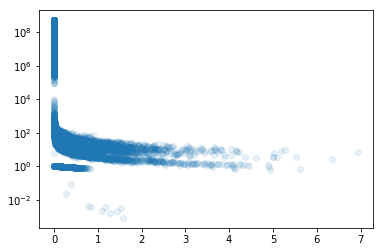

In [151]:
plt.yscale('log')
plt.scatter(sim_mll_results.D, sim_mll_results.max_delta, alpha=0.1);

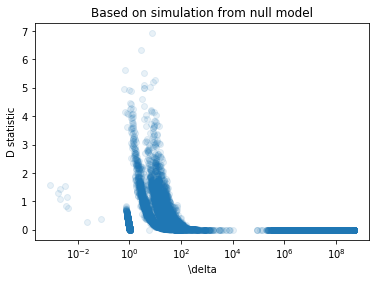

In [163]:
plt.xscale('log')
# plt.yscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.D, alpha=0.1);
# plt.axvline(5e4, c='k', lw=1);
plt.xlabel('\delta')
plt.ylabel('D statistic');
plt.title('Based on simulation from null model');

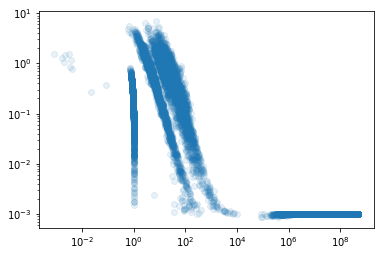

In [153]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.D, alpha=0.1);

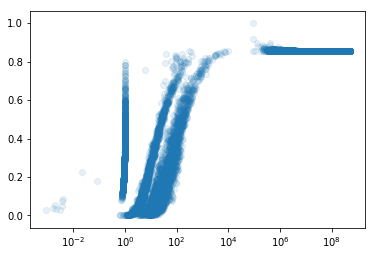

In [154]:
plt.xscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.pval, alpha=0.1);

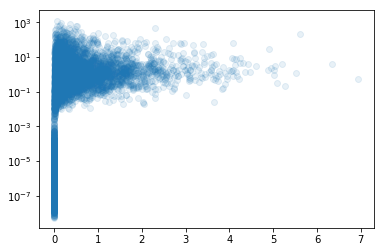

In [155]:
plt.yscale('log')
plt.scatter(sim_mll_results.D, sim_mll_results.max_s2_t_hat, alpha=0.1);

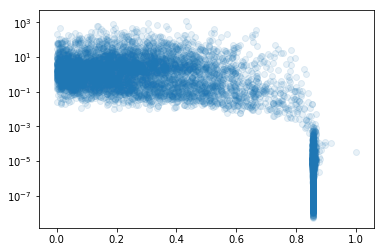

In [156]:
plt.yscale('log')
plt.scatter(sim_mll_results.pval, sim_mll_results.max_s2_t_hat, alpha=0.1);

In [103]:
np.log(sim_mll_results.max_delta.max())

20.0

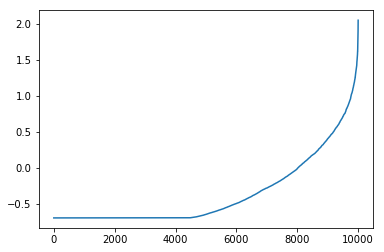

In [104]:
tmp = sim_mll_results.D.sort_values(ascending=True).as_matrix()
# plt.xscale('log')
# plt.yscale('log')
plt.plot(np.log(tmp));